In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

X, y = make_circles(n_samples=1000, noise=0.2, shuffle=False, factor=0.5)

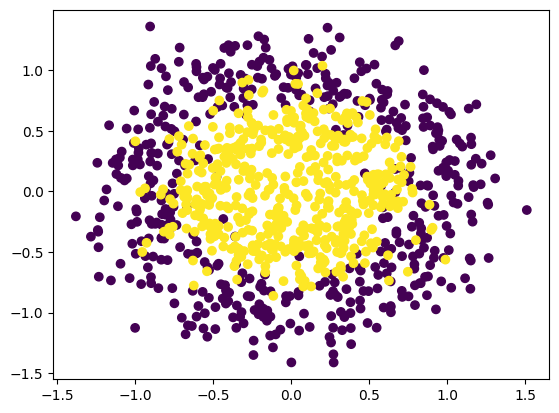

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logistic_regression = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression(max_iter=100000))
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('logisticregression', LogisticRegression(max_iter=100000))])

In [77]:
svm_hard = SVC(kernel='rbf', C=1000, gamma='scale', max_iter=100000)
svm_hard.fit(X_train, y_train)

SVC(C=1000, max_iter=100000)

In [78]:
svm_soft = SVC(kernel='rbf', C=1, gamma='scale', max_iter=1000000)
svm_soft.fit(X_train, y_train)

SVC(C=1, max_iter=1000000)

In [79]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


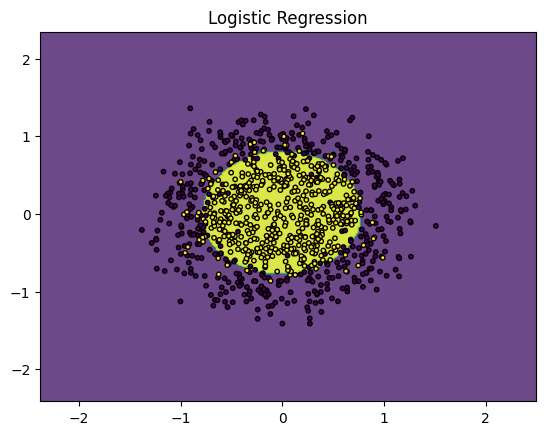

In [80]:
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=10)
plt.title("Logistic Regression")
plt.show()

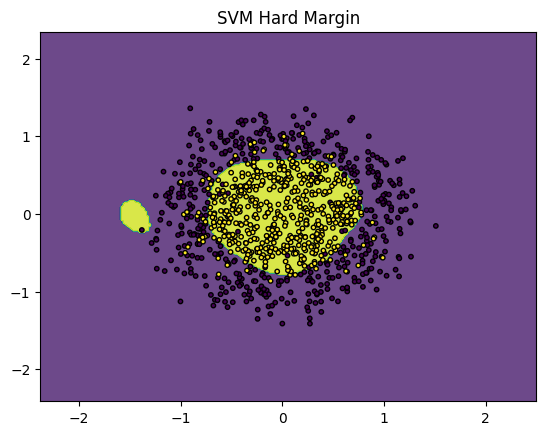

In [81]:
Z = svm_hard.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=10)
plt.title("SVM Hard Margin")
plt.show()

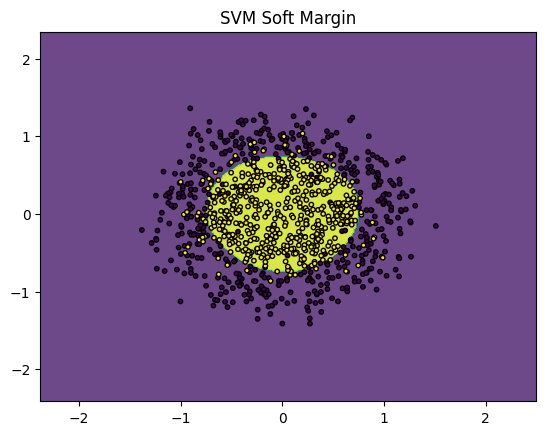

In [82]:
Z = svm_soft.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=10)
plt.title("SVM Soft Margin")
plt.show()

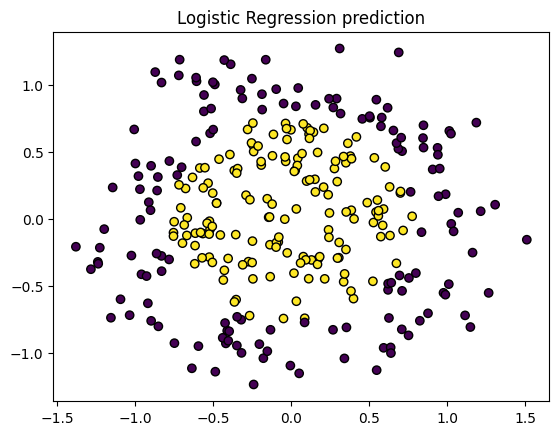

0.8933333333333333


In [83]:
y_logistic_pred = logistic_regression.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic_pred, edgecolors='k')
plt.title("Logistic Regression prediction")
plt.show()

print(logistic_accuracy)

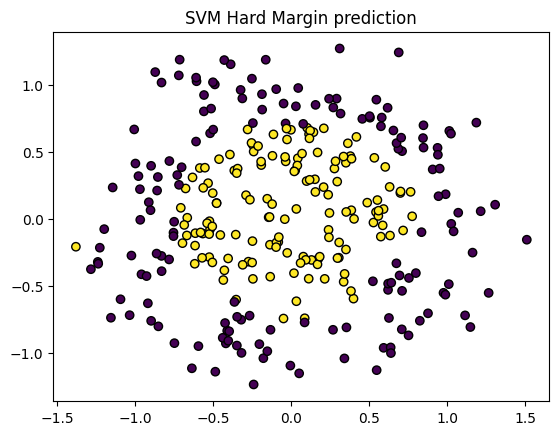

0.9033333333333333


In [84]:
y_svm_hard_pred = svm_hard.predict(X_test)

svm_hard_accuracy = accuracy_score(y_test, y_svm_hard_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svm_hard_pred, edgecolors='k')
plt.title("SVM Hard Margin prediction")
plt.show()

print(svm_hard_accuracy)

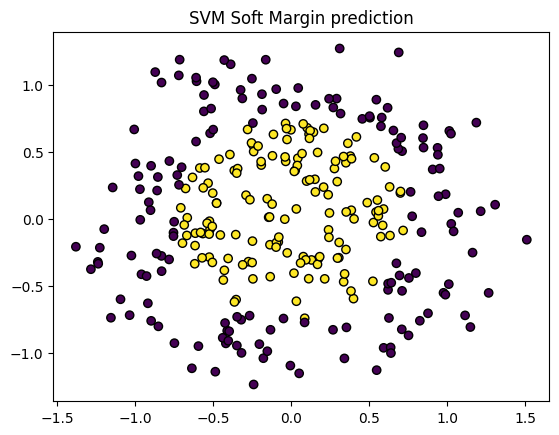

0.9033333333333333


In [85]:
y_svm_soft_pred = svm_soft.predict(X_test)

svm_soft_accuracy = accuracy_score(y_test, y_svm_soft_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svm_soft_pred, edgecolors='k')
plt.title("SVM Soft Margin prediction")
plt.show()

print(svm_soft_accuracy)